# Image-colored wordclouds

To summarize a few of the talks given in various meetings, I experimented with a bit with word clouds. Here are some results and python snippets for possible recreation and reference for myself.

One of the results from the H.E.S.S. Collaboration Meeting in April 2021 is shown on [twitter](https://twitter.com/hesstelescopes/status/1385168031689711617).

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

### First example using lots of defaults

As example, we use the text from the H.E.S.S. [Source of the Month of May 2021](https://www.mpi-hd.mpg.de/hfm/HESS/pages/home/som/2021/05/).

In [3]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()
text = open(os.path.join(d, 'data/som.txt'), encoding="utf-8").read()

# We wanna use HESS as a word, so let's remove its dots 
text = text.replace('H.E.S.S.','HESS')
#print(text)

# Create stopword list:
stopwords = set(STOPWORDS)
#print(stopwords)

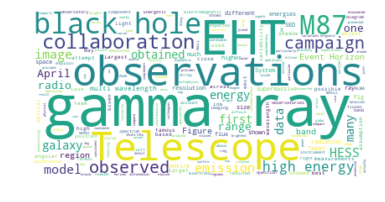

In [4]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Second example using the flag of Namibia as general outline

https://commons.wikimedia.org/wiki/File:Flag_of_Namibia.svg

In [5]:
mask = np.array(Image.open("data/1920px-Flag_of_Namibia.svg.png"))
image_colors = ImageColorGenerator(mask)

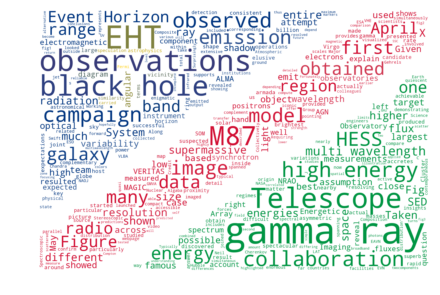

In [6]:
plt.figure(figsize=[7,7])
plt.axis("off")
wc_namib = WordCloud(stopwords=stopwords, background_color="white", max_words=10000, mask=mask).generate(text)
plt.imshow(wc_namib.recolor(color_func=image_colors), interpolation="bilinear")

### Third exmaple of actually using a telescope mask

The mask image has been previously created with GIMP by myself. 

In [7]:
ct5_color = np.array(Image.open("data/HESS_CT5_mask.png"))
# ct5_color = ct5_color[::3, ::3]
ct5_mask = ct5_color.copy()
# ct5_mask[ct5_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(ct5_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
ct5_mask[edges > .08] = 255

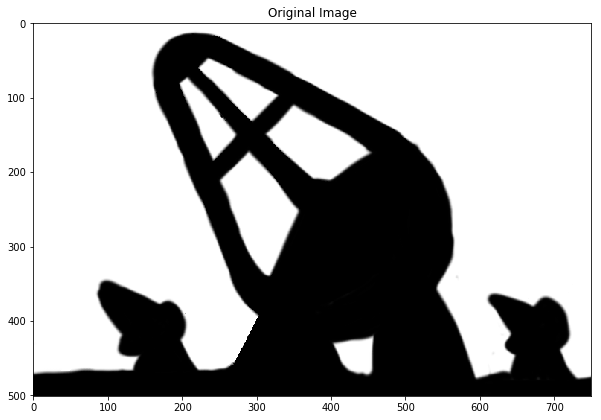

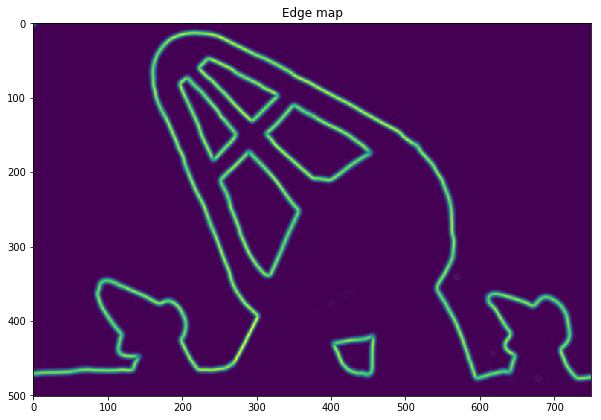

In [8]:
plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(ct5_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

In [9]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(os.path.join(d, 'data/som.txt'), encoding="utf-8").read()
text = text.replace('H.E.S.S.','HESS')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["e.g.","still","due","e","g"])
stopwords.update(["collaboration","Figure","Fig","April"])

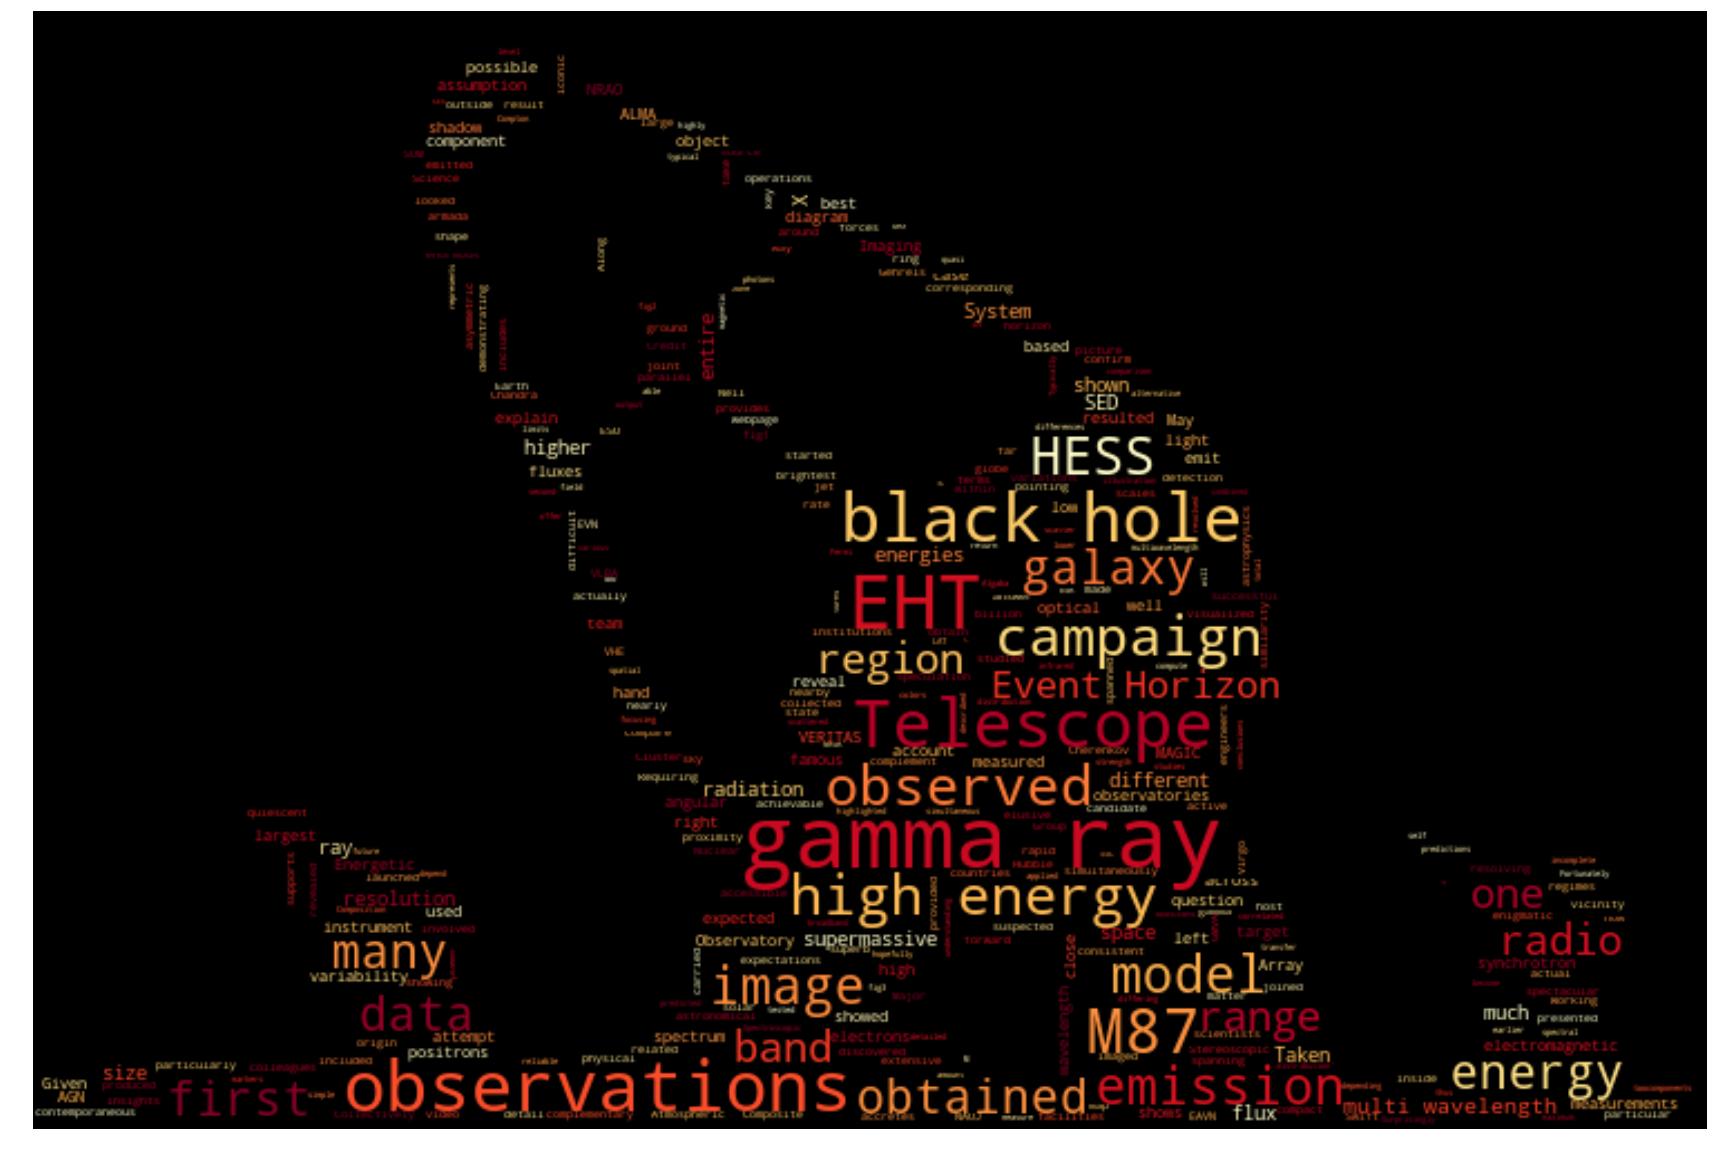

In [10]:
# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=20000, mask=ct5_mask,stopwords=stopwords,colormap='YlOrRd') 
###,contour_width=0.1, contour_color='grey')

# generate word cloud
wc.generate(text)
plt.figure(figsize=(30, 30))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

# Summary

The above gives a quick idea of what can be done to summarize a text in an image. Its a nice tool if you already have lots of text, and you can simply remove a few words of the text which seem not so useful, e.g. references to figures etc. 

### Take home message

If you only have slides in pdf format, the whole thing is a bit more tricky as some conversion will be needed (and if the slides have footers or headers the result might be biased towards the presentation title or speaker - same applies to slides where on every new slide just one bullet point gets added). 

In any case, to convert pdf slides into text, simply use 'pdftotext' on the linux command line. 